In [546]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [547]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

In [548]:
df.columns = ['city','population','violent_crime','murder','rape_revised','rape_legacy','robbery','aggravated_assault','property_crime','burglary','larceny_theft','vehicle_theft','arson', '?']
df.drop(labels= [0,1,2,3, 353,353,354], axis = 0, inplace = True)

In [549]:
df = df[['murder','population','property_crime','robbery', 'burglary', 'larceny_theft', 'vehicle_theft']]

In [550]:
columns = list(df.columns)
for column in columns:
    df[column] = df[column].str.replace(',', '')

In [551]:
df.head()

,murder,population,property_crime,robbery,burglary,larceny_theft,vehicle_theft
4,0,1861,12,0,2,10,0
5,0,2577,24,0,3,20,1
6,0,2846,16,0,1,15,0
7,8,97956,4090,227,705,3243,142
8,0,6388,223,4,53,165,5


In [552]:
df = df.apply(pd.to_numeric)

In [553]:
#Property crime = alpha + Population + Population^2 + Murder + Robbery
df['population_squared'] = df['population']**2
df['murder'] = df['murder'].apply(lambda x: 0 if x <= 0 else 1)
df['robbery'] = df['robbery'].apply(lambda x: 0 if x <= 0 else 1)

df.dropna(inplace = True)
df.head()

,murder,population,property_crime,robbery,burglary,larceny_theft,vehicle_theft,population_squared
4,0,1861.0,12.0,0,2.0,10.0,0.0,3.463321e+06
5,0,2577.0,24.0,0,3.0,20.0,1.0,6.640929e+06
6,0,2846.0,16.0,0,1.0,15.0,0.0,8.099716e+06
7,1,97956.0,4090.0,1,705.0,3243.0,142.0,9.595378e+09
8,0,6388.0,223.0,1,53.0,165.0,5.0,4.080654e+07


Removed the outliers from population and population squared columns.

In [554]:
columns = list(df[['population','population_squared']].columns)
for column in columns: 
    q25 = df[column].quantile(0.25)
    q75 = df[column].quantile(0.75)
    iqr = q75 - q25
    max = q75 + (iqr * 1.5)
    df=df.where(df[column] < max)

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


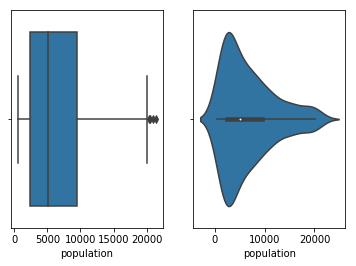

In [555]:
plt.subplot(121)
population = sns.boxplot(df['population'])
plt.subplot(122)
population = sns.violinplot(df['population'])

In [556]:
df.fillna(0, inplace= True)

In [557]:
features = ['population', 'population_squared', 'murder', 'robbery' ]
X = df[features]
y = df.property_crime

In [558]:
X.shape, y.shape

((348, 4), (348,))

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### First Model

In [560]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

print('\nCoefficients: \n', lr.coef_)
print('\nIntercept: \n', lr.intercept_)
print('\nR-Squared:')
print(lr.score(X_test, y_test))


Coefficients: 
 [9.69174096e-03 2.63179384e-07 1.13787477e+02 9.13761373e+01]

Intercept: 
 -3.249460035589024

R-Squared:
0.5335915254592191


## Assumption one: linear relationship

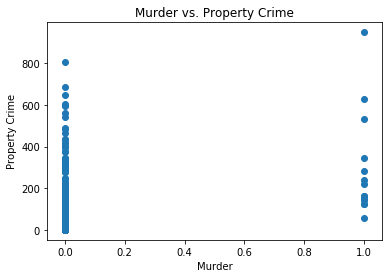

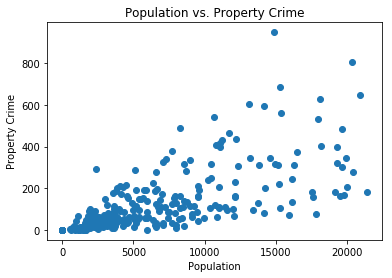

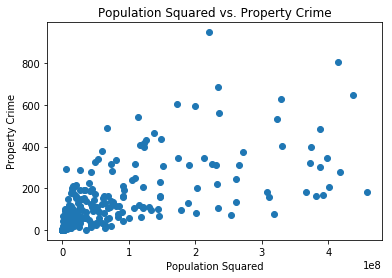

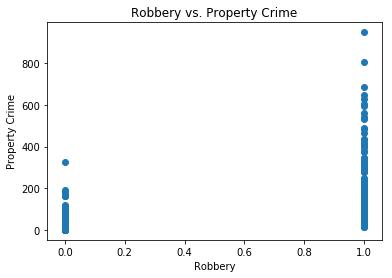

In [585]:
plt.scatter(y=df.property_crime, x = df.murder)
plt.ylabel('Property Crime')
plt.xlabel('Murder')
plt.title('Murder vs. Property Crime')
plt.show()

plt.scatter(y=df.property_crime, x = df.population)
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()

plt.scatter(y=df.property_crime, x=df.population_squared)
plt.ylabel('Property Crime')
plt.xlabel('Population Squared')
plt.title('Population Squared vs. Property Crime')
plt.show()

plt.scatter(y=df.property_crime, x = df.robbery)
plt.ylabel('Property Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Property Crime')
plt.show()


## Assumption two: multivariate normality

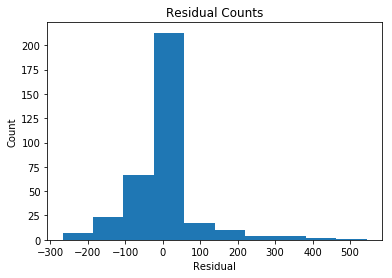

In [586]:
predicted = lr.predict(X)
actual = y
residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

## Assumption three: homoscedasticity

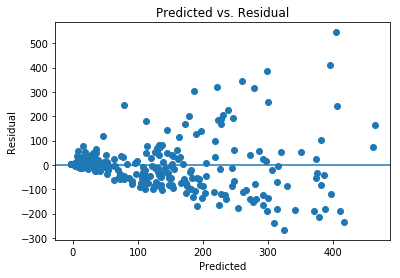

In [587]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline( y = 0)
plt.title('Predicted vs. Residual')
plt.show()

## Assumption four: low multicollinearity

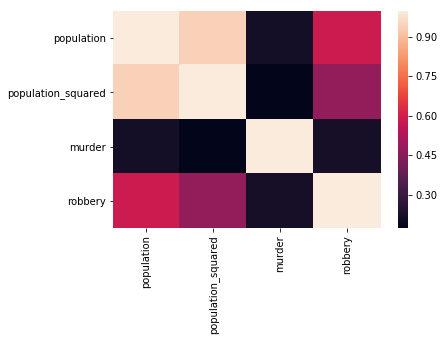

In [588]:
correlation_matrix = X.corr()
sns.heatmap(X.corr())

I will remove population because it has a high correlation with population squared. I will add burglary, larceny theft, and vehicle theft to the 2nd model.

## Feature engineering

In [589]:
df['burglary'] = df['burglary'].apply(lambda x: 0 if x <= 0 else 1)
df['larceny_theft'] = df['larceny_theft'].apply(lambda x: 0 if x <= 0 else 1)
df['vehicle_theft'] = df['vehicle_theft'].apply(lambda x: 0 if x <= 0 else 1)
df.fillna(0, inplace = True)
df.apply(pd.to_numeric)

,murder,population,property_crime,robbery,burglary,larceny_theft,vehicle_theft,population_squared
4,0.0,1861.0,12.0,0.0,1,1,0,3463321.0
5,0.0,2577.0,24.0,0.0,1,1,1,6640929.0
6,0.0,2846.0,16.0,0.0,1,1,0,8099716.0
7,0.0,0.0,0.0,0.0,0,0,0,0.0
8,0.0,6388.0,223.0,1.0,1,1,1,40806544.0
9,0.0,4089.0,46.0,1.0,1,1,0,16719921.0
10,0.0,1781.0,10.0,0.0,0,1,0,3171961.0
11,0.0,0.0,0.0,0.0,0,0,0,0.0
12,0.0,9519.0,210.0,1.0,1,1,1,90611361.0
13,0.0,18182.0,405.0,1.0,1,1,1,330585124.0


## Rechecking the four assumptions for my second model

### Linear relationship

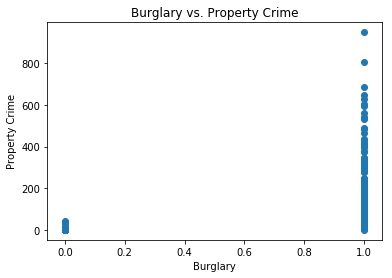

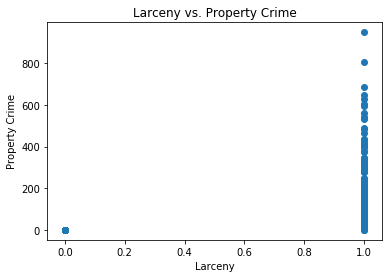

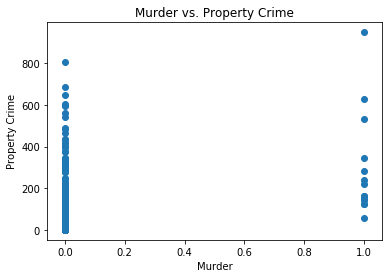

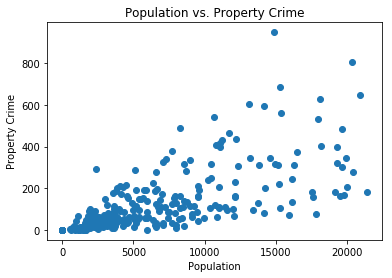

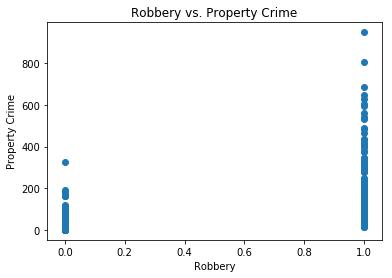

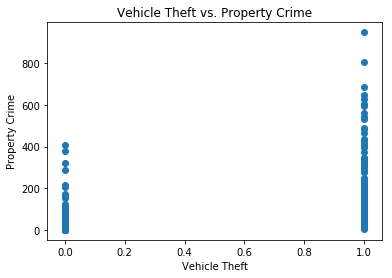

In [590]:
plt.scatter(y=df['property_crime'], x=df['burglary'])
plt.ylabel('Property Crime')
plt.xlabel('Burglary')
plt.title('Burglary vs. Property Crime')
plt.show()

plt.scatter(y=df['property_crime'], x=df['larceny_theft'])
plt.ylabel('Property Crime')
plt.xlabel('Larceny')
plt.title('Larceny vs. Property Crime')
plt.show()

plt.scatter(y=df['property_crime'], x=df['murder'])
plt.ylabel('Property Crime')
plt.xlabel('Murder')
plt.title('Murder vs. Property Crime')
plt.show()

plt.scatter(y=df['property_crime'], x=df['population'])
plt.ylabel('Property Crime')
plt.xlabel('Population')
plt.title('Population vs. Property Crime')
plt.show()

plt.scatter(y=df['property_crime'], x=df['robbery'])
plt.ylabel('Property Crime')
plt.xlabel('Robbery')
plt.title('Robbery vs. Property Crime')
plt.show()

plt.scatter(y=df['property_crime'], x=df['vehicle_theft'])
plt.ylabel('Property Crime')
plt.xlabel('Vehicle Theft')
plt.title('Vehicle Theft vs. Property Crime')
plt.show()

### Multivariate normality

In [591]:
features1 = ['population_squared','robbery','murder','vehicle_theft',  'larceny_theft', 'burglary']
X1 = df[features1]
y1 = df.property_crime


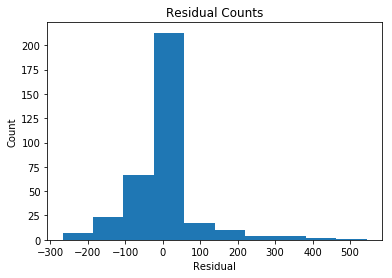

In [592]:
predicted = lr.predict(X).ravel()
actual = y1
residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### Homoscedasticity

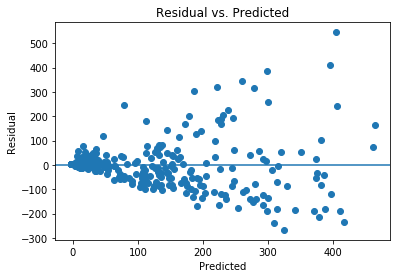

In [593]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
### Low Mmlticollinearity

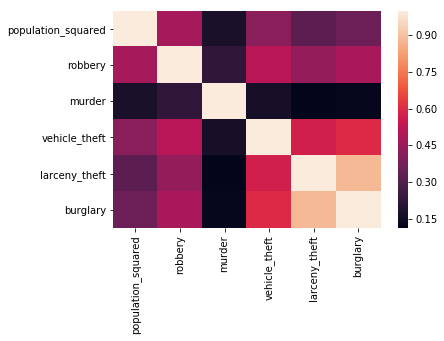

In [597]:
correlation_matrix = X1.corr()
sns.heatmap(correlation_matrix)

## Second Model

In [595]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)

In [596]:
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)
lr1.score(X1_test, y1_test)

print('\nCoefficients: \n', lr1.coef_)
print('\nIntercept: \n', lr1.intercept_)
print('\nR-Squared:')
print(lr1.score(X1_test, y1_test))


Coefficients: 
 [7.09406378e-07 9.02317569e+01 1.04083536e+02 5.42460378e+00
 4.72117004e+00 2.17998547e+01]

Intercept: 
 -0.40755857074073276

R-Squared:
0.6602074858549473
